### Урок 7. Многомерный статистический анализ. Линейная регрессия

In [3]:
import numpy as np

1) Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [89]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [90]:
b = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
b

2.620538882402765

In [91]:
n = 10
b2 = (n*(np.sum(zp*ks)) - (np.sum(zp)*np.sum(ks)))/(n*(np.sum(zp**2))-((np.sum(zp)**2)))
b2

2.6205388824027653

In [92]:
a=np.mean(ks)-b*np.mean(zp)
a

444.1773573243596

In [93]:
ks_hat = 444.18 + 2.62*zp
ks_hat

array([535.88, 562.08, 941.98, 968.18, 548.98, 627.58, 585.66, 837.18,
       758.58, 732.38])

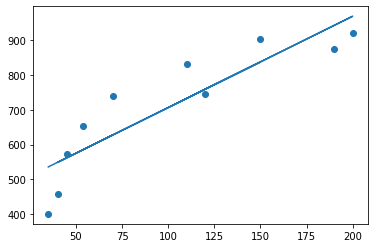

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zp, ks)
plt.plot(zp, 444.18 + 2.62*zp)
plt.show()

In [95]:
mse=((ks-ks_hat)**2).sum()/n
mse

6470.417919999998

In [96]:
X = zp.reshape((n, 1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [97]:
y = ks.reshape((n, 1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [134]:
X_with_intersept = np.hstack([np.ones((n,1)),X])
X_with_intersept

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [99]:
B_with_inersept = np.dot(np.linalg.inv(np.dot(X_with_intersept.T, X_with_intersept)),X_with_intersept.T@y)
B_with_inersept

array([[444.17735732],
       [  2.62053888]])

In [100]:
B_without = np.dot(np.linalg.inv(np.dot(X.T, X)),X.T@y)
B_without

array([[5.88982042]])

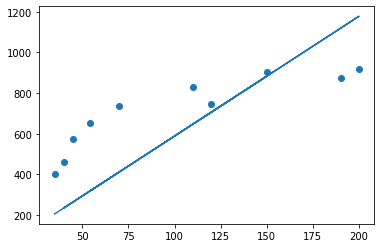

In [101]:
plt.scatter(zp, ks)
plt.plot(zp, 5.88982042*zp)
plt.show()

In [102]:
ks_hat_without = 5.88982042*zp
ks_hat_without

array([ 206.1437147 ,  265.0419189 , 1119.0658798 , 1177.964084  ,
        235.5928168 ,  412.2874294 ,  318.05030268,  883.473063  ,
        706.7784504 ,  647.8802462 ])

In [103]:
mse_without=((ks-ks_hat_without)**2).sum()/n
mse_without # ошибка выше

56516.85841571943

2) Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [104]:
def mse_(B1, y=ks, X=zp, n=10):
    return np.sum((B1*X-y)**2)/n

In [114]:
alpha = 1e-6
B1 = 0.1
n = 10
for i in range(551):
    B1 -= alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    if i%50 == 0:
        print(f'It№{i}, B1={B1}, mse={mse_(B1)}')

It№0, B1=0.25952808, mse=493237.7212546963
It№50, B1=4.497229618367758, mse=83233.94472982832
It№100, B1=5.54537842245223, mse=58151.31823171113
It№150, B1=5.804626485478126, mse=56616.849068093856
It№200, B1=5.868748638669329, mse=56522.97550129376
It№250, B1=5.884608547059329, mse=56517.232638059555
It№300, B1=5.888531320728348, mse=56516.88130936019
It№350, B1=5.889501575592372, mse=56516.85981627392
It№400, B1=5.8897415574471985, mse=56516.85850140053
It№450, B1=5.889800914315978, mse=56516.858420961085
It№500, B1=5.889815595583751, mse=56516.858416040064
It№550, B1=5.889819226833643, mse=56516.858415739014


Медленно, но верно двигаемся к цели

In [110]:
alpha = 1e-5
B1 = 0.1
for i in range(50):
    B1 -= alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    if i%10 == 0:
        print(f'It№{i}, B1={B1}, mse={mse_(B1)}')

It№0, B1=1.6952808000000004, mse=298904.5992334053
It№10, B1=5.722758921136703, mse=56901.35704574499
It№20, B1=5.883166639986514, mse=56517.468344241344
It№30, B1=5.889555411195862, mse=56516.859383246396
It№40, B1=5.88980986526988, mse=56516.858417254174


При большем alpha обеспечилась более быстрая сходимость

In [116]:
alpha = 1e-4
B1 = 0.1
for i in range(551):
    B1 -= alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    if i%50 == 0:
        print(f'It№{i}, B1={B1}, mse={mse_(B1)}')

It№0, B1=16.052808000000002, mse=1479451.1269782982
It№50, B1=16781719350799.465, mse=3.879850189447203e+30
It№100, B1=2.771095626710154e+25, mse=1.0579011149798205e+55
It№150, B1=4.575795132701359e+37, mse=2.8845308824540057e+79
It№200, B1=7.555820482929684e+49, mse=7.865119238474006e+103
It№250, B1=1.2476612591822015e+62, mse=2.144546311211147e+128
It№300, B1=2.0602112254797037e+74, mse=5.847436944670758e+152
It№350, B1=3.4019412419478966e+86, mse=1.5943940516999098e+177
It№400, B1=5.617484299927177e+98, mse=4.347361786282885e+201
It№450, B1=9.275918546394367e+110, mse=1.1853753769767565e+226
It№500, B1=1.5316939093262548e+123, mse=3.232109158194091e+250
It№550, B1=2.5292225455980185e+135, mse=8.812845123479344e+274


за 551 итерацию не нашли минимум, так как alpha был слишком большой

3) В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 

Мы используем Z критерий, когда знаем среднеквадратическое отклонение генеральной совокупности, в обратной ситуации рассчитываем среднеквадратическое отклонение по имеющимся данным и используем критерий Стьюдента

4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [117]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [135]:
zp_for_grad = np.vstack([np.ones((1,n)),zp])
zp_for_grad

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [163]:
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [174]:
X = zp_for_grad
X

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [175]:
y = ks
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [171]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [284]:
n = X.shape[1]
alpha = 0.00013445
W = np.array([440, 0.1])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(300):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if err < 6474.37:
        print(f'Iteration #{i}: W_new = {W}, alpha = {alpha}, MSE = {round(err,2)}')
        break
    if i % 208 == 0:
        alpha /= 1.69

Number of objects = 10        
Learning rate = 0.00013445        
Initial weights = [4.4e+02 1.0e-01] 

Iteration #246: W_new = [440.31459382   2.64945734], alpha = 4.707468225902454e-05, MSE = 6474.24
